In [1]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as pltv
import gower
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import altair as alt
alt.data_transformers.enable("vegafusion")

DataTransformerRegistry.enable('vegafusion')

In [2]:
df = pd.read_pickle("../data/processed.pkl")
categorical_columns = df.select_dtypes(include=['category']).columns

In [3]:
# with open("../data/data_element_details.pkl", "rb") as file:
#     data_element_details = pickle.load(file)

In [4]:
# keep_cols = []
# for value in data_element_details.values():
#     if value['Section Name'] in ["Health Care Access", "Chronic Health Conditions"] and value['Label'] in df.columns:
#         keep_cols.append(value['Label'])
# df = df[keep_cols]

In [5]:
import pandas as pd
import prince

# Load the dataset
data = df

# Select the categorical columns for MCA
mca_columns = categorical_columns  # Replace with your categorical column names

# Create an instance of the MCA class
mca = prince.MCA(
    n_components=40,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

# Fit the MCA model to the data
mca.fit(data[mca_columns])

MCA(n_components=40, n_iter=3, random_state=42)

In [6]:
row_coords = mca.row_coordinates(df)

Attempt 0: k=2
silhouette_avg=0.16026768125758456
Attempt 1: k=3
silhouette_avg=0.10049884925139942
Attempt 2: k=4
silhouette_avg=0.08560450695106187
Attempt 3: k=5
silhouette_avg=0.07896745919581474
Attempt 4: k=6
silhouette_avg=0.12696328263865167
Attempt 5: k=7
silhouette_avg=0.07690643625974937
Attempt 6: k=8
silhouette_avg=0.09714530738662217
Attempt 7: k=9
silhouette_avg=0.10434760948287082
Attempt 8: k=10
silhouette_avg=0.07925981629746415
Attempt 9: k=11
silhouette_avg=0.1173117237174311
Attempt 10: k=12
silhouette_avg=0.06366184101117552
Attempt 11: k=13
silhouette_avg=0.1002838284646697
Attempt 12: k=14
silhouette_avg=0.11169777641382743
Attempt 13: k=15
silhouette_avg=0.10266504751272133
Attempt 14: k=16
silhouette_avg=0.09878382364658207
Attempt 15: k=17
silhouette_avg=0.11144767689407473
Attempt 16: k=18
silhouette_avg=0.10186997327749778
Attempt 17: k=19
silhouette_avg=0.11900725368975618
Attempt 18: k=20
silhouette_avg=0.1276978039426956
Attempt 19: k=21
silhouette_avg=0

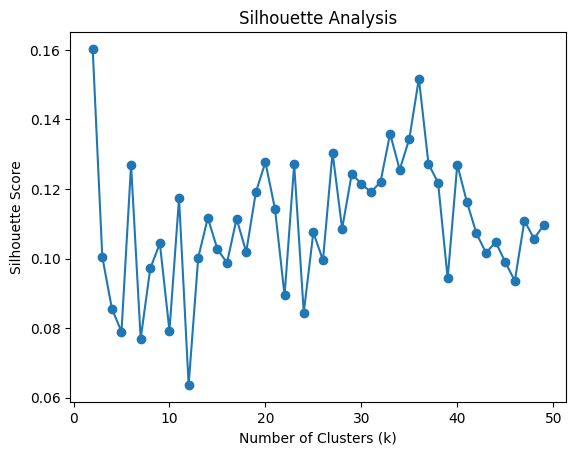

Cluster Labels (Optimal): [1 1 1 ... 0 0 0]
Cluster Centroids (Optimal): [[ 9.66329463e-02 -1.01212560e-01 -3.07652862e-02  1.94544270e-03
  -1.08597206e-02  3.60008407e-02  6.05243568e-03  1.35944908e-02
   5.94331391e-03 -1.77522543e-02 -4.83611651e-03 -1.09000770e-02
  -1.13275529e-02 -6.83651024e-04  3.36441191e-03  8.78385847e-03
  -1.91798668e-03  4.56984335e-03 -2.42894837e-03  3.36707962e-03
  -6.82072290e-04  5.20219451e-03 -1.07334725e-03  7.01557647e-03
   2.94248415e-04 -4.65455850e-04  8.97857064e-03 -2.96803412e-03
   3.40530541e-03 -6.92088362e-03 -4.88671936e-03  5.82721118e-03
   1.64940999e-03 -3.53054217e-03 -4.83345234e-04  1.46427018e-03
  -4.40743859e-03 -3.70586954e-03 -7.31667065e-04  9.91289525e-04]
 [-3.29158866e-01  4.03821590e-01  8.73505573e-02 -1.02290859e-02
   4.88750748e-02 -9.75091245e-02 -3.36998690e-02 -3.77764895e-02
  -1.92290075e-03  4.07184610e-02 -1.65796089e-02  6.43759970e-02
   3.38828044e-03 -1.45323253e-02 -9.22139357e-03 -2.12560284e-02
  

In [7]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Specify the range of k values to try
k_values = range(2, 50)

# Initialize an empty list to store the silhouette scores
silhouette_scores = []

# Iterate over each k value
for i, k in enumerate(k_values):
    print(f"Attempt {i}: k={k}")
    # Create a MiniBatchKMeans object with the current k value
    mbk = MiniBatchKMeans(n_clusters=k, batch_size=100, random_state=42)
    
    # Fit the model to the MCA row coordinates
    mbk.fit(row_coords)
    
    # Get the cluster labels for each data point
    labels = mbk.labels_
    
    # Calculate the silhouette score for the current clustering
    silhouette_avg = silhouette_score(row_coords, labels)
    print(f"silhouette_avg={silhouette_avg}")
    
    # Append the silhouette score to the list
    silhouette_scores.append(silhouette_avg)

# Find the optimal number of clusters
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]

# Print the optimal number of clusters
print("The optimal number of clusters based on Silhouette Score is", optimal_k)

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

# Create a MiniBatchKMeans object with the optimal k value
mbk_optimal = MiniBatchKMeans(n_clusters=optimal_k, batch_size=100, random_state=42)

# Fit the model to the MCA row coordinates
mbk_optimal.fit(row_coords)

# Get the cluster labels for each data point
labels_optimal = mbk_optimal.labels_

# Get the cluster centers
centroids_optimal = mbk_optimal.cluster_centers_

# Print the cluster labels and centroids for the optimal clustering
print("Cluster Labels (Optimal):", labels_optimal)
print("Cluster Centroids (Optimal):", centroids_optimal)

In [8]:
with open('../data/silhouette_scores_4.pickle', 'wb') as handle:
    pickle.dump(silhouette_scores, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('../data/mbk_optimal_4.pickle', 'wb') as handle:
    pickle.dump(mbk_optimal, handle, protocol=pickle.HIGHEST_PROTOCOL)